In [34]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sn

stocks = ['AAPL', 'TSLA', 'NVDA', 'K', 'CRSP', 'NEM', 'PLTR']

end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(2*365)

price = yf.download(stocks, period = '2y')['Adj Close'].pct_change().dropna()

returns = price

class EfficientFrontier:
    def __init__(self,returns, assets):
        self.returns = returns
        self.assets = assets
 
    def Calc(self):
        self.tbl = pd.DataFrame(index = self.assets)
        self.tbl['Mean'] = self.returns.mean()
        self.tbl['Variance'] = self.returns.var()
        return self.tbl.T
   
    def correlation(self):
        self.tbl = pd.DataFrame(index = self.assets)
        self.corr = self.returns.corr()
        return self.corr
    
    #code taken from https://www.youtube.com/watch?v=Isutk-wqJfE
    def PortfolioReturn(self, weight):
        return np.sum(self.returns.mean() * weight) * 252
    
    #code taken from https://www.youtube.com/watch?v=Isutk-wqJfE
    def PortfolioVolatility(self, weight):
        return np.sqrt(np.dot(weight.T, np.dot(self.returns.cov() * 252, weight)))
    
    def MonteCarlo(self, simulations = 100000):
        returnCol = []
        volatilityCol = []
        weightsCol = []
        sharperatioCol = []

        for i in range (simulations):
            weights = np.random.random(len(stocks))
            weights /= np.sum(weights)
            weightsCol.append(weights)
            port_return = self.PortfolioReturn(weights)
            port_volatility = self.PortfolioVolatility(weights)
            returnCol.append(port_return)
            volatilityCol.append(port_volatility)
            sharperatioCol.append((port_return - 0.01) / port_volatility)
            
        returnCol = np.array(returnCol)
        volatilityCol = np.array(volatilityCol)
        sharperatioCol = np.array(sharperatioCol)

        max_sharpe_idx = sharperatioCol.argmax()
        optimal_weights = weightsCol[max_sharpe_idx]
        
        return returnCol, volatilityCol, sharperatioCol, optimal_weights

ef = EfficientFrontier(returns = returns, assets = stocks)

[*********************100%***********************]  7 of 7 completed


In [35]:
print('Mean and Variance Table: ')
display(ef.Calc().T) 

Mean and Variance Table: 


,Mean,Variance
AAPL,0.000943,0.000227
TSLA,0.000930,0.001380
NVDA,0.005196,0.001098
K,0.000474,0.000208
CRSP,0.000445,0.001267
NEM,0.000602,0.000511
PLTR,0.004012,0.001698


Correlation Matrix: 


,AAPL,CRSP,K,NEM,NVDA,PLTR,TSLA
AAPL,1.000000,0.332843,-0.037882,0.154060,0.424294,0.360843,0.425800
CRSP,0.332843,1.000000,0.001206,0.158483,0.233889,0.378259,0.300940
K,-0.037882,0.001206,1.000000,0.077860,-0.166259,-0.048777,-0.047201
NEM,0.154060,0.158483,0.077860,1.000000,0.051520,0.107826,-0.001553
NVDA,0.424294,0.233889,-0.166259,0.051520,1.000000,0.366574,0.355859
PLTR,0.360843,0.378259,-0.048777,0.107826,0.366574,1.000000,0.386347
TSLA,0.425800,0.300940,-0.047201,-0.001553,0.355859,0.386347,1.000000


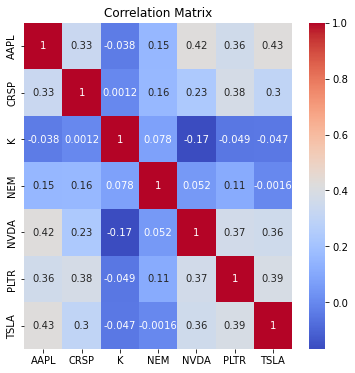

In [36]:
print('Correlation Matrix: ')
display(ef.correlation())

plt.figure(figsize=(6, 6))
sn.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

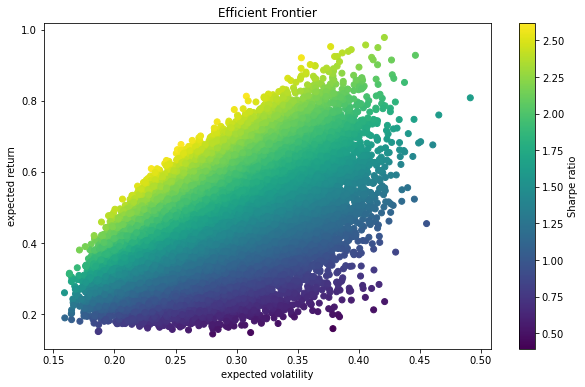

In [39]:
returnCol, volatilityCol, sharpe_ratio, optimal_weights = ef.MonteCarlo()

plt.figure(figsize = (10, 6))
plt.scatter(volatilityCol, returnCol, c = sharpe_ratio, cmap = 'viridis')
plt.title('Efficient Frontier')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()

In [40]:
optimal_weights_table = pd.DataFrame({
    'Asset': stocks,
    'Optimal Weight': optimal_weights
})
print("Optimal Weights for Maximum Sharpe Ratio:")
display(optimal_weights_table.style.hide_index())

Optimal Weights for Maximum Sharpe Ratio:


Asset,Optimal Weight
AAPL,0.016614
TSLA,0.028684
NVDA,0.382001
K,0.067287
CRSP,0.359925
NEM,0.139983
PLTR,0.005508
